# Linear Regression with Scikit Learn
This notebook contains python code to help you get started with the workshop. It will load the data from the scikit-learn library and import the appropriate libraries. In addition to this starter file, there is a complete notebook 'Linear-regression-COMPLETE.ipynb' which contains all of the code we will covering today. 

In [1]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
%matplotlib inline

In [2]:
# Load the dataset from the sklearn library
# today we will be examining the boston housing dataset
# For more information check out https://archive.ics.uci.edu/ml/datasets/Housing 
boston_housing = datasets.load_boston()
input_features = boston_housing.data
target_features = boston_housing.target.reshape(506,1)
# The following line will print a description of the dataset to the screen.
# it is not required for the rest of the lesson to work, you may comment it out
# if you wish
print(boston_housing.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
print(input_features.shape)
print(target_features.shape)

(506, 13)
(506, 1)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_features, target_features, test_size=.33, random_state=42)

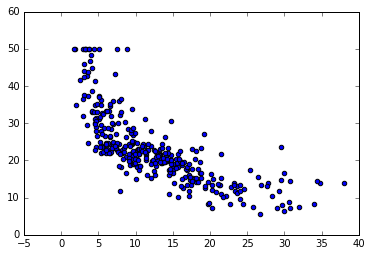

In [17]:
# Extract the 12th feature
training_features = X_train[:,12].reshape(339,1)
testing_features = X_test[:,12].reshape(167,1)

plt.scatter(training_features, y_train)

In [9]:
from sklearn.linear_model import LinearRegression

# Create Linear regression object
reg = LinearRegression()

# Fit to our data
reg.fit(training_features, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

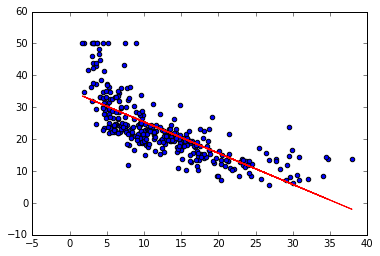

In [11]:
# Plot the data and the model
plt.scatter(training_features, y_train)

# Predict with our model
predictions = reg.predict(training_features)
plt.plot(training_features, predictions,'r')

In [12]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [18]:
polynomial = PolynomialFeatures(degree=3)
training_features_3 = polynomial.fit_transform(training_features)

In [19]:
# Create regression object and fit it as we did before
reg = LinearRegression()
reg.fit(training_features_3, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[[  0.00000000e+00  -3.85946424e+00   1.44458484e-01  -1.89103933e-03]]


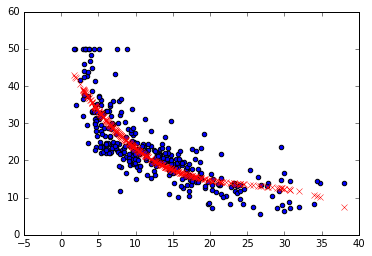

In [22]:
predictions = reg.predict(training_features_3)

# plot the data
plt.scatter(training_features, y_train)
plt.plot(training_features, predictions, 'rx')
print reg.coef_

In [25]:
testing_features_3 = polynomial.fit_transform(testing_features)
print reg.score(testing_features_3, y_test)
print reg.score(training_features_3, y_train)

0.594749976969
0.68048119031


In [26]:
# Multivariate regression
reg = LinearRegression()
reg.fit(X_train, y_train)

print(reg.score(X_test, y_test))

0.725851581823
